In [4]:
!pip install pandas openpyxl
import pandas as pd
# Load the Excel file
file_path = 'qPCR_Project.xlsx'  # Ensure this file is in the same directory as your notebook
data = pd.read_excel(file_path, skiprows=1)  # Skip the first row to align the headers properly

# Display the initial structure to understand it
data.head()

  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 53.1 MB/s eta 0:00:000m eta 0:00:0101:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.3/251.3 kB 14.3 MB/s eta 0:00:00
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)


,Row Labels,gapdh,srsf5,supt6h,Grand Total,Unnamed: 5,kolf,19.591105,23.594093,4.002987,0.062371,Unnamed: 11
0,NaN,31.702870,36.941978,28.669887,31.537498,NaN,srsf5_1,19.037416,25.870169,6.832753,0.008773,0.140655
1,kolf,19.591105,23.594093,25.825042,22.150336,NaN,srsf5_4,18.954411,25.702467,6.748056,0.009303,0.149160
2,srsf5_1,19.037416,25.870169,NaN,22.453793,NaN,srsf5_6,18.878522,25.868751,6.990229,0.007866,0.126110
3,srsf5_4,18.954411,25.702467,NaN,22.328439,NaN,supt6h_c2_1,19.662520,26.776114,7.113593,0.007221,0.115775
4,srsf5_6,18.878522,25.868751,NaN,22.373637,NaN,supt6h_c2_3,19.514139,26.721388,7.207249,0.006767,0.108498


In [7]:
import pandas as pd
# Load the Excel file
file_path = 'qPCR.xlsx'  # Ensure this file is in the same directory as your notebook
data = pd.read_excel(file_path)  # Skip the first row to align the headers properly

# Display the initial structure to understand it
data.head()

,Lines,Reference,Target,dCT,CT,Unnamed: 5
0,kolf,19.591105,23.594093,4.002987,0.062371,NaN
1,srsf5_1,19.037416,25.870169,6.832753,0.008773,0.140655
2,srsf5_4,18.954411,25.702467,6.748056,0.009303,0.149160
3,srsf5_6,18.878522,25.868751,6.990229,0.007866,0.126110
4,supt6h_c2_1,19.662520,26.776114,7.113593,0.007221,0.115775


In [8]:
# Calculating Delta Ct
data['Delta_Ct'] = data['Target'] - data['Reference']
data.head()

,Lines,Reference,Target,dCT,CT,Unnamed: 5,Delta_Ct
0,kolf,19.591105,23.594093,4.002987,0.062371,NaN,4.002987
1,srsf5_1,19.037416,25.870169,6.832753,0.008773,0.140655,6.832753
2,srsf5_4,18.954411,25.702467,6.748056,0.009303,0.149160,6.748056
3,srsf5_6,18.878522,25.868751,6.990229,0.007866,0.126110,6.990229
4,supt6h_c2_1,19.662520,26.776114,7.113593,0.007221,0.115775,7.113593


In [10]:
data['Real_Change'] = 2 ** -data['Delta_Ct']
data.head()

,Lines,Reference,Target,dCT,CT,Unnamed: 5,Delta_Ct,Real_Change
0,kolf,19.591105,23.594093,4.002987,0.062371,NaN,4.002987,0.062371
1,srsf5_1,19.037416,25.870169,6.832753,0.008773,0.140655,6.832753,0.008773
2,srsf5_4,18.954411,25.702467,6.748056,0.009303,0.149160,6.748056,0.009303
3,srsf5_6,18.878522,25.868751,6.990229,0.007866,0.126110,6.990229,0.007866
4,supt6h_c2_1,19.662520,26.776114,7.113593,0.007221,0.115775,7.113593,0.007221


In [12]:
# Filtering for KOLF samples to calculate the average Real Change
kolf_data = data[data['Lines'] == 'kolf']
kolf_avg = kolf_data['Real_Change'].mean()
data['Fold_Change'] = data['Real_Change'] / kolf_avg

print(f"KOLF Average Real Change: {kolf_avg}")
data.head()

KOLF Average Real Change: 0.06237072218818297


,Lines,Reference,Target,dCT,CT,Unnamed: 5,Delta_Ct,Real_Change,Fold_Change
0,kolf,19.591105,23.594093,4.002987,0.062371,NaN,4.002987,0.062371,1.000000
1,srsf5_1,19.037416,25.870169,6.832753,0.008773,0.140655,6.832753,0.008773,0.140655
2,srsf5_4,18.954411,25.702467,6.748056,0.009303,0.149160,6.748056,0.009303,0.149160
3,srsf5_6,18.878522,25.868751,6.990229,0.007866,0.126110,6.990229,0.007866,0.126110
4,supt6h_c2_1,19.662520,26.776114,7.113593,0.007221,0.115775,7.113593,0.007221,0.115775


In [13]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.2/162.2 kB 1.4 MB/s eta 0:00:001.5 MB/s eta 0:00:01
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 25.0 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.2/309.2 kB 6.4 MB/s eta 0:00:000m eta 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 61.2 MB/s eta 0:00:000m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 21.0 MB/s eta 0:00:000m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 62.7 MB/s eta 0:00:000m eta 0:00:01
Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)


In [18]:
# Calculate the average fold change for srsf5 lines
srsf5_lines = data[data['Lines'].str.contains('srsf5')]
srsf5_avg_fold_change = srsf5_lines['Fold_Change'].mean()

In [19]:
print(f"Average Fold Change for SRSF5 lines: {srsf5_avg_fold_change}")
print(f"KOLF Average Real: {kolf_avg}")

Average Fold Change for SRSF5 lines: 0.13864179557941833
KOLF Average Real: 0.06237072218818297


In [21]:
supt6hc2_lines = data[data['Lines'].str.contains('supt6h_c2')]
supt6hc2_avg_fold_change = supt6hc2_lines['Fold_Change'].mean()
print(f"Average Fold Change for SUPT6Hc2 lines: {supt6hc2_avg_fold_change}")

Average Fold Change for SUPT6Hc2 lines: 0.10864436856399824


In [22]:
supt6hc5_lines = data[data['Lines'].str.contains('supt6h_c5')]
supt6hc5_avg_fold_change = supt6hc5_lines['Fold_Change'].mean()
print(f"Average Fold Change for SUPT6Hc5 lines: {supt6hc5_avg_fold_change}")

Average Fold Change for SUPT6Hc5 lines: 0.11360593348042847


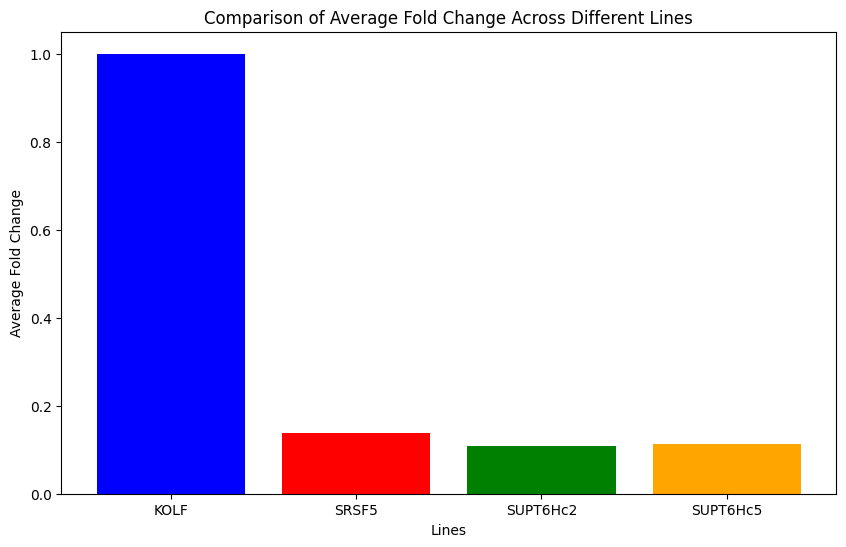

In [25]:
import matplotlib.pyplot as plt

kolf_FC = 1

# Data for plotting
categories = ['KOLF', 'SRSF5', 'SUPT6Hc2', 'SUPT6Hc5']
values = [kolf_FC, srsf5_avg_fold_change, supt6hc2_avg_fold_change, supt6hc5_avg_fold_change]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color=['blue', 'red', 'green', 'orange'])
plt.xlabel('Lines')
plt.ylabel('Average Fold Change')
plt.title('Comparison of Average Fold Change Across Different Lines')
plt.show()